In [1]:
import pandas as pd
import sodapy as sd
import matplotlib as mp
import matplotlib.pyplot as plt
import numpy as np
import pandas_bokeh as pbk
import geopandas
pbk.output_notebook()

Loading BokehJS ...

In [2]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

from sodapy import Socrata

client = Socrata("analisi.transparenciacatalunya.cat", None)

results = client.get("rmgc-ncpb", limit=16774)

# Convert to pandas DataFrame
df = pd.DataFrame.from_records(results)

In [3]:
# Tenim en la columnna 'dat' el dia i l'hora juntes, volem separar-les en dues noves columnes 'data' i 'hora'
dist_morts=df[["dat","f_morts"]]
dist_morts.head()

,dat,f_morts
0,2010-01-25T23:33:00.000,0
1,2010-10-31T01:00:00.000,0
2,2010-05-17T15:27:00.000,1
3,2010-08-21T22:30:00.000,0
4,2010-05-07T17:45:00.000,0


In [4]:
# Canviem la T que separa dia i hora per identificar la separació dues vegades: amb ' ' i amb '-'
df['dat'] = df['dat'].str.replace('T',' -')
df[['data','hora']] = df["dat"].str.split(" ", 1, expand=True)
df['data']=df['data'].astype("datetime64")
df["hora"] = df["hora"].str.strip("-")
df.head()

,any,zona,dat,via,pk,nommun,nomcom,nomdem,f_morts,f_ferits_greus,...,d_titularitat_via,d_tracat_altimetric,d_vent,grupdialab,hor,gruphor,tipacc,tipdia,data,hora
0,2010,Zona urbana,2010-01-25 -23:33:00.000,SE,999999,CANOVES I SAMALUS,Valles Oriental,Barcelona,0,1,...,NA,NA,"Calma, vent molt suau",Feiners,2333,Nit,Col.lisió de vehicles en marxa,dill-dij,2010-01-25,23:33:00.000
1,2010,Carretera,2010-10-31 -01:00:00.000,N-240,999,LLEIDA,Segria,Lleida,0,1,...,Estatal,Pla,"Calma, vent molt suau",CapDeSetmana,1,Nit,Sortida de la calcada sense especificar,dg,2010-10-31,01:00:00.000
2,2010,Carretera,2010-05-17 -15:27:00.000,N-II,7087,FORNELLS DE LA SELVA,Girones,Girona,1,0,...,Estatal,Rampa o pendent,"Calma, vent molt suau",Feiners,1527,Tarda,Col.lisió de vehicles en marxa,dill-dij,2010-05-17,15:27:00.000
3,2010,Zona urbana,2010-08-21 -22:30:00.000,SE,999999,BARCELONA,Barcelones,Barcelona,0,2,...,NA,NA,"Calma, vent molt suau",CapDeSetmana,223,Nit,Col.lisió de vehicles en marxa,dis,2010-08-21,22:30:00.000
4,2010,Zona urbana,2010-05-07 -17:45:00.000,SE,999999,BADALONA,Barcelones,Barcelona,0,1,...,NA,NA,"Calma, vent molt suau",CapDeSetmana,1745,Tarda,Bolcada a la calcada,div,2010-05-07,17:45:00.000


In [5]:
# Ara ja podem trobar distribucions en funció del dia i de l'hora
dist_morts=df[["data","f_morts"]]
dist_morts.head()

,data,f_morts
0,2010-01-25,0
1,2010-10-31,0
2,2010-05-17,1
3,2010-08-21,0
4,2010-05-07,0


In [6]:
# Fem un subdataset dels morts que n'hi ha en els accidents que han ocorregut només en comarques de Barcelona
dist_morts_geograf=df[['nomdem','nomcom','f_morts']]
dist_morts_geograf.set_index('nomdem', inplace=True)
dist_morts_geograf_barna=dist_morts_geograf.loc[['Barcelona']]
dist_morts_geograf_barna.head()

,nomcom,f_morts
nomdem,,
Barcelona,Valles Oriental,0
Barcelona,Barcelones,0
Barcelona,Barcelones,0
Barcelona,Barcelones,0
Barcelona,Barcelones,1


<AxesSubplot:ylabel='nomcom'>

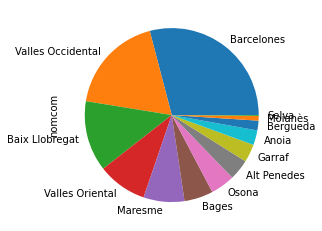

In [7]:
# Obtenim un diagrama de bescuit del nombre d'accidents que ocorre en cada comarca de Barcelona
# No tenim en compte ferits o morts perquè encara no sabem fer que es compten adequadament
dist_morts_geograf_barna['nomcom'].value_counts().plot.pie()

In [8]:
# Volem representar un histograma on es vegin la quantitat de morts cada any
# Després podríem fer un histograma combinat amb morts i ferits (amb els morts baix perquè és el més important)
morts_cat=df[["any","data","f_morts"]]
morts_cat=morts_cat.drop(index=morts_cat[morts_cat['f_morts']== '0'].index)
morts_cat.set_index("any", inplace=True)
morts_cat

,data,f_morts
any,,
2010,2010-05-17,1
2010,2010-10-23,1
2010,2010-07-02,1
2010,2010-02-08,1
2010,2010-06-23,1
...,...,...
2018,2018-12-16,1
2018,2018-03-27,1
2018,2018-05-12,1


In [9]:
# Volem crear un dataframe amb el nombre de morts en accidents cada any

morts_cat10=morts_cat.loc[['2010']]
morts_cat11=morts_cat.loc[['2011']]
morts_cat12=morts_cat.loc[['2012']]
morts_cat13=morts_cat.loc[['2013']]
morts_cat14=morts_cat.loc[['2014']]
morts_cat15=morts_cat.loc[['2015']]
morts_cat16=morts_cat.loc[['2016']]
morts_cat17=morts_cat.loc[['2017']]
morts_cat18=morts_cat.loc[['2018']]
morts_10=morts_cat10.loc[:, 'f_morts'].sum()
morts_11=morts_cat11.loc[:, 'f_morts'].sum()
morts_12=morts_cat12.loc[:, 'f_morts'].sum()
morts_13=morts_cat13.loc[:, 'f_morts'].sum()
morts_14=morts_cat14.loc[:, 'f_morts'].sum()
morts_15=morts_cat15.loc[:, 'f_morts'].sum()
morts_16=morts_cat16.loc[:, 'f_morts'].sum()
morts_17=morts_cat17.loc[:, 'f_morts'].sum()
morts_18=morts_cat18.loc[:, 'f_morts'].sum()

def getSum(n):
    
    sum = 0
    for digit in str(n): 
      sum += int(digit)      
    return sum
   

print(getSum(morts_10),getSum(morts_11),getSum(morts_12),getSum(morts_13),getSum(morts_14),getSum(morts_15),getSum(morts_16),getSum(morts_17),getSum(morts_18))


339 280 274 232 230 261 222 240 260


In [12]:
# # Scatter
# mortsperanyscat.plot.scatter(x='any',y='morts')
# mortsperanyscat.plot.line(x='any', y='morts')
# plt.show()
# ax = mortsperanyscat.plot(x='any', y='morts')
# df2.plot(ax=ax)

pandas.core.frame.DataFrame

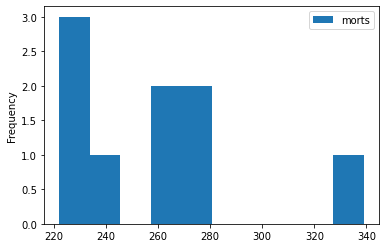

In [13]:
# Histograma
mortsperany=pd.DataFrame({"morts":[339,280,274,232,230,261,222,240,260]}, index=[2010,2011,2012,2013,2014,2015,2016,2017,2018])
mortsperany.plot.hist()
type(mortsperany)

In [14]:
#Encara quees digui morts_cat, aquí estem calculant el nombre de ferits lleus per any

morts_cat=df[["any","data","f_ferits_lleus"]]
morts_cat=morts_cat.drop(index=morts_cat[morts_cat['f_ferits_lleus']== '0'].index)
morts_cat.set_index("any", inplace=True)
morts_cat

morts_cat10=morts_cat.loc[['2010']]
morts_cat11=morts_cat.loc[['2011']]
morts_cat12=morts_cat.loc[['2012']]
morts_cat13=morts_cat.loc[['2013']]
morts_cat14=morts_cat.loc[['2014']]
morts_cat15=morts_cat.loc[['2015']]
morts_cat16=morts_cat.loc[['2016']]
morts_cat17=morts_cat.loc[['2017']]
morts_cat18=morts_cat.loc[['2018']]
morts_10=morts_cat10.loc[:, 'f_ferits_lleus'].sum()
morts_11=morts_cat11.loc[:, 'f_ferits_lleus'].sum()
morts_12=morts_cat12.loc[:, 'f_ferits_lleus'].sum()
morts_13=morts_cat13.loc[:, 'f_ferits_lleus'].sum()
morts_14=morts_cat14.loc[:, 'f_ferits_lleus'].sum()
morts_15=morts_cat15.loc[:, 'f_ferits_lleus'].sum()
morts_16=morts_cat16.loc[:, 'f_ferits_lleus'].sum()
morts_17=morts_cat17.loc[:, 'f_ferits_lleus'].sum()
morts_18=morts_cat18.loc[:, 'f_ferits_lleus'].sum()

def getSum(n):
    
    sum = 0
    for digit in str(n): 
      sum += int(digit)      
    return sum
   

print(getSum(morts_10),getSum(morts_11),getSum(morts_12),getSum(morts_13),getSum(morts_14),getSum(morts_15),getSum(morts_16),getSum(morts_17),getSum(morts_18))

865 748 870 734 733 729 670 656 669


In [15]:
#Encara quees digui morts_cat, aquí estem calculant el nombre de ferits greus per any

morts_cat=df[["any","data","f_ferits_greus"]]
morts_cat=morts_cat.drop(index=morts_cat[morts_cat['f_ferits_greus']== '0'].index)
morts_cat.set_index("any", inplace=True)
morts_cat

morts_cat10=morts_cat.loc[['2010']]
morts_cat11=morts_cat.loc[['2011']]
morts_cat12=morts_cat.loc[['2012']]
morts_cat13=morts_cat.loc[['2013']]
morts_cat14=morts_cat.loc[['2014']]
morts_cat15=morts_cat.loc[['2015']]
morts_cat16=morts_cat.loc[['2016']]
morts_cat17=morts_cat.loc[['2017']]
morts_cat18=morts_cat.loc[['2018']]
morts_10=morts_cat10.loc[:, 'f_ferits_greus'].sum()
morts_11=morts_cat11.loc[:, 'f_ferits_greus'].sum()
morts_12=morts_cat12.loc[:, 'f_ferits_greus'].sum()
morts_13=morts_cat13.loc[:, 'f_ferits_greus'].sum()
morts_14=morts_cat14.loc[:, 'f_ferits_greus'].sum()
morts_15=morts_cat15.loc[:, 'f_ferits_greus'].sum()
morts_16=morts_cat16.loc[:, 'f_ferits_greus'].sum()
morts_17=morts_cat17.loc[:, 'f_ferits_greus'].sum()
morts_18=morts_cat18.loc[:, 'f_ferits_greus'].sum()

def getSum(n):
    
    sum = 0
    for digit in str(n): 
      sum += int(digit)      
    return sum
   

print(getSum(morts_10),getSum(morts_11),getSum(morts_12),getSum(morts_13),getSum(morts_14),getSum(morts_15),getSum(morts_16),getSum(morts_17),getSum(morts_18))

2007 1866 1980 1901 1888 1900 1821 1711 1736


In [16]:
greus_any_cat=pd.DataFrame({"any":[2010,2011,2012,2013,2014,2015,2016,2017,2018],"greus":[2007,1866,1980,1901,1888,1900,1821,1711,1736]})
greus_any_cat

lleus_any_cat=pd.DataFrame({"any":[2010,2011,2012,2013,2014,2015,2016,2017,2018],"lleus":[865,748,870,734,733,729,670,656,669]})
lleus_any_cat

mortsperanyscat=pd.DataFrame({"any":[2010,2011,2012,2013,2014,2015,2016,2017,2018],"morts":[339,280,274,232,230,261,222,240,260]})
mortsperanyscat

,any,morts
0,2010,339
1,2011,280
2,2012,274
3,2013,232
4,2014,230
5,2015,261
6,2016,222
7,2017,240
8,2018,260


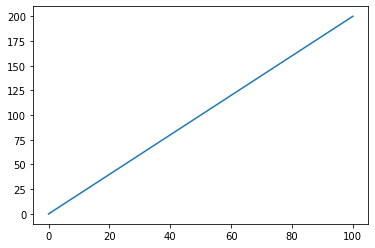

In [17]:
conjunt_ferits = pd.concat([lleus_any_cat,greus_any_cat], axis=1)
conjunt_ferits = conjunt_ferits.drop(columns=['any'])
conjunt_ferits['any'] = 2010,2011,2012,2013,2014,2015,2016,2017,2018
conjunt_ferits = pd.DataFrame(conjunt_ferits).set_index("any")
conjunt_ferits

p_stacked_bar = conjunt_ferits.plot_bokeh.bar(
    ylabel="Wounded",
    xlabel = 'Year',
    title="Number of Wounded by year",
    legend = False,
    stacked=True,
    alpha=0.6)

x=np.linspace(0,100,10)
y= 2*x
plt.plot(x,y)
plt.show()

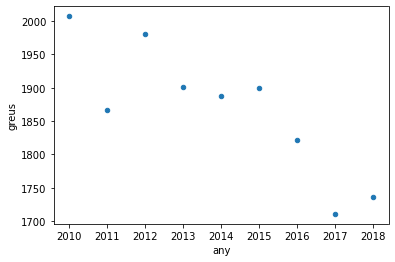

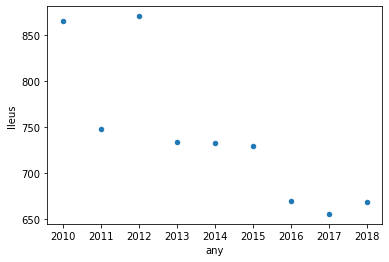

In [18]:
# Scatter
#mortsperanyscat.plot.scatter(x='any',y='morts')
#mortsperanyscat.plot.line(x='any', y='morts')
#plt.show()
ax = greus_any_cat.plot.scatter(x='any', y='greus')
ax = lleus_any_cat.plot.scatter(x='any', y='lleus')

In [21]:
#greus_any_cat=greus_any_cat.to_numpy()
greus_any_cat

,any,greus
0,2010,2007
1,2011,1866
2,2012,1980
3,2013,1901
4,2014,1888
5,2015,1900
6,2016,1821
7,2017,1711
8,2018,1736


In [22]:
# plt.scatter(greus_any_cat[:,0], greus_any_cat[:,1], label="Ferits Greus")
# plt.plot(greus_any_cat[:,0], greus_any_cat[:,1])

# plt.scatter(lleus_any_cat[:,0], lleus_any_cat[:,1], label="Ferits Lleus")
# plt.plot(lleus_any_cat[:,0], lleus_any_cat[:,1])

# plt.title("Número de afectats per any")
# plt.xlabel("Anys")
# plt.ylabel("Afectats")

# plt.legend(loc="center right")
# plt.legend(bbox_to_anchor=(1.31, 0.7))


# plt.show()

In [23]:
plt.scatter(mortsperanyscat[:,0], mortsperanyscat[:,1], label="Morts")
plt.plot(mortsperanyscat[:,0], mortsperanyscat[:,1])

plt.show()

TypeError: '(slice(None, None, None), 0)' is an invalid key

In [24]:
mortsperanyscat
p_bar = mortsperanyscat.plot_bokeh.bar(
    ylabel="Morts", 
    title="Morts per any", 
    alpha=0.6)

In [25]:
mortsperanyscat
mortsperanyscat.plot_bokeh.scatter(x='any',y='morts')

Figure(id='1331', ...)

In [26]:
mortsperanyscat.plot_bokeh.line(x='any',y='morts', plot_data_points=True,
    plot_data_points_size=10, legend = False, xlabel= 'Year', ylabel = 'Number of deaths')

Figure(id='1464', ...)

In [27]:
#greus_any_cat = pd.DataFrame(greus_any_cat).set_index("any")
greus_any_cat
p_stacked_bar = greus_any_cat.plot_bokeh.bar(
    ylabel="Price per Unit [€]",
    title="Fruit prices per Year",
    stacked=True,
    alpha=0.6)

In [28]:
p_scatter = greus_any_cat.plot_bokeh.scatter(
    x="petal length (cm)",
    y="sepal width (cm)",
    category="species",
    title="Iris DataSet Visualization")

Exception: Please provide for the <x> parameter either a column name of the DataFrame/Series or an array of the same length.

In [29]:
#greus_lleus_any=df[["any","f_ferits_greus","f_ferits_lleus"]]
#greus_lleus_any

In [30]:
p_scatter = greus_lleus_any.plot_bokeh.scatter(
    x="any",
    y="f_ferits_greus",
    category="species",
    title="Iris DataSet Visualization")

NameError: name 'greus_lleus_any' is not defined

In [31]:
hora = df[["hora"]]
hora.index.name = 'index'
#hora.reset_index(level=0, inplace=True)
hora = hora['hora'].value_counts()
hora = hora.to_frame()
#hora.groupby('hora')['index'].sum()
hora = hora.sort_index()

#hora.index = pd.to_datetime(hora.index)
#hora.index = [time_stamp.time() for time_stamp in hora.index]
hora = hora.reset_index()
hora['index'] = pd.to_datetime(hora['index'])
hora
#hora.groupby(pd.Grouper(freq='10Min')).count().plot(kind='bar')
#hora['index'].groupby(pd.Grouper(freq='10Min'))

,index,hora
0,2021-11-27 00:00:00,13
1,2021-11-27 00:01:00,5
2,2021-11-27 00:02:00,1
3,2021-11-27 00:03:00,2
4,2021-11-27 00:04:00,1
...,...,...
1383,2021-11-27 23:52:00,2
1384,2021-11-27 23:53:00,3
1385,2021-11-27 23:55:00,12
1386,2021-11-27 23:57:00,3


In [32]:
horat = hora.T
print(horat)
horat.hist(column='hora', bins=20)

                      0                    1                    2     \
index  2021-11-27 00:00:00  2021-11-27 00:01:00  2021-11-27 00:02:00   
hora                    13                    5                    1   

                      3                    4                    5     \
index  2021-11-27 00:03:00  2021-11-27 00:04:00  2021-11-27 00:05:00   
hora                     2                    1                   13   

                      6                    7                    8     \
index  2021-11-27 00:06:00  2021-11-27 00:07:00  2021-11-27 00:08:00   
hora                     1                    1                    2   

                      9     ...                 1378                 1379  \
index  2021-11-27 00:09:00  ...  2021-11-27 23:47:00  2021-11-27 23:48:00   
hora                     3  ...                    8                    3   

                      1380                 1381                 1382  \
index  2021-11-27 23:49:00  2021-11-27 23:50:

KeyError: "None of [Index(['hora'], dtype='object')] are in the [columns]"

In [33]:
p_bar = hora.plot_bokeh.bar(
    ylabel="Price per Unit [€]", 
    title="Fruit prices per Year",
    xlabel = 'Hores',
    alpha=0.6)